## Problem Set #3

### Preparation 

In [2]:
# import packages
import pandas as pd
import numpy as np
import scipy.optimize as opt
import time 


In [3]:
# Read Stata data
psid_data = pd.read_stata('C:/Users/Jie Lian/CompEcon_Fall19/Optimization/PS3_data.dta')
psid_data.head(n=10)


,id68,year,intid,relhh,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,...,redpregovinc,hsex,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce
0,1,1967,1,Head,1200.0,2000.0,NaN,NaN,0,NaN,...,5614.0,1.0,2.0,52.0,46.0,1.0,2.0,8.0,8.0,0.0
1,2,1967,2,Head,0.0,0.0,NaN,NaN,0,NaN,...,0.0,1.0,2.0,56.0,57.0,1.0,2.0,3.0,3.0,0.0
2,3,1967,3,Head,0.0,0.0,NaN,NaN,0,NaN,...,0.0,1.0,2.0,77.0,64.0,1.0,2.0,NaN,3.0,0.0
3,4,1967,4,Head,1560.0,0.0,NaN,NaN,6,1.0,...,3280.0,1.0,2.0,45.0,44.0,1.0,2.0,8.0,5.0,0.0
4,5,1967,5,Head,2500.0,2000.0,NaN,NaN,3,1.0,...,7900.0,1.0,2.0,24.0,22.0,1.0,2.0,10.0,9.0,0.0
5,6,1967,6,Head,2230.0,120.0,NaN,NaN,2,1.0,...,6269.0,1.0,2.0,49.0,46.0,1.0,2.0,8.0,13.0,0.0
6,7,1967,7,Head,2254.0,1144.0,NaN,NaN,3,1.0,...,8743.0,1.0,2.0,51.0,42.0,1.0,2.0,7.0,7.0,0.0
7,8,1967,8,Head,1763.0,1960.0,NaN,NaN,2,NaN,...,9677.0,1.0,2.0,47.0,43.0,1.0,2.0,5.0,9.0,0.0
8,9,1967,9,Head,0.0,0.0,NaN,NaN,0,NaN,...,1.0,1.0,2.0,66.0,63.0,1.0,2.0,12.0,12.0,0.0
9,10,1967,10,Head,1560.0,0.0,NaN,NaN,3,NaN,...,6301.0,1.0,2.0,57.0,58.0,1.0,2.0,16.0,11.0,0.0


In [4]:
psid_data.describe()

,id68,year,intid,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,hrace,...,redpregovinc,hsex,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce
count,123786.000000,123786.000000,123786.000000,123786.000000,123786.000000,9.023300e+04,48496.000000,123786.000000,90603.000000,123656.000000,...,1.237860e+05,123786.000000,80758.0,123786.000000,80758.000000,123786.000000,80758.000000,122809.000000,80091.000000,123786.000000
mean,1494.639475,1984.831273,3271.379429,1679.269897,633.026917,4.211505e+04,22026.289062,0.843771,1.098220,1.129731,...,3.012258e+04,1.233072,2.0,45.545547,41.390785,39.620201,55.346169,12.666091,12.720081,0.557690
std,838.901790,9.836212,2277.056058,1061.704712,878.422791,4.670424e+04,21336.107422,1.182829,0.356161,0.394627,...,4.588795e+04,0.422940,0.0,17.623671,14.786721,69.003265,77.864296,2.917721,2.422607,0.265198
min,1.000000,1967.000000,1.000000,0.000000,0.000000,6.353981e-01,1.192780,0.000000,1.000000,1.000000,...,-1.324040e+05,1.000000,2.0,16.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,772.000000,1977.000000,1444.000000,832.000000,0.000000,1.979858e+04,8016.247070,0.000000,1.000000,1.000000,...,7.700000e+03,1.000000,2.0,31.000000,29.000000,1.000000,2.000000,12.000000,12.000000,0.362158
50%,1517.000000,1985.000000,2984.000000,1976.000000,0.000000,3.460022e+04,18122.412109,0.000000,1.000000,1.000000,...,1.900000e+04,1.000000,2.0,42.000000,39.000000,3.000000,3.000000,12.000000,12.000000,0.599887
75%,2224.000000,1993.000000,4763.000000,2350.000000,1454.000000,5.267309e+04,30256.060547,2.000000,1.000000,1.000000,...,3.910775e+04,1.000000,2.0,58.000000,51.000000,22.000000,170.000000,15.000000,14.000000,0.786908
max,2930.000000,2002.000000,16968.000000,7800.000000,5840.000000,3.771521e+06,856942.062500,11.000000,8.000000,8.000000,...,3.660000e+06,2.000000,2.0,102.000000,95.000000,227.000000,231.000000,17.000000,17.000000,0.928007


###### Part of the Dictionary of the dataset: 

* `hlabinc` = annual labor income of the head
* `hannhrs` = annual hours of the head
* `hsex` = gender of the head (1=Male, 2=Female)
* `hrace` = race of the head (1=White, 2=Black, 3=Native American, 4=Asian/Pacic     Islander, 5=His-panic, 6,7=Other)
* `age` = age of the head
* `hyrsed` = years of education of the head

### Clean and transform the data

In [5]:
# Clean the data
# Drop if missing value for hlabinc and hannhrs
psid_data = psid_data[(psid_data.hlabinc.isnull() != True) & 
                         (psid_data.hannhrs.isnull() != True) &
                     (psid_data['hannhrs']>0)]

# Creat dependent variable w and lnw
psid_data['w'] = psid_data['hlabinc'] / psid_data['hannhrs']
psid_data['lnw'] = np.log(psid_data['w'])

# Continue dropping 
psid_data = psid_data[(psid_data.w.isnull() != True) & 
                         (psid_data.lnw.isnull() != True)]

# Create dummy variable DhraceB, DhraceH, DhraceO
psid_data['DhraceB'] = psid_data['hrace'] == 2
psid_data['DhraceH'] = psid_data['hrace'] == 5
psid_data['DhraceO'] = (psid_data['hrace'] > 2) & (psid_data['hrace'] != 5)

In [6]:
psid_data.describe()

,id68,year,intid,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,hrace,...,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce,w,lnw
count,90041.000000,90041.000000,90041.000000,90041.000000,90041.000000,9.004100e+04,45673.000000,90041.000000,74042.000000,89923.000000,...,63091.0,90041.000000,63091.000000,90041.000000,63091.000000,89537.000000,62617.000000,90041.000000,90041.000000,90041.000000
mean,1510.727402,1986.337879,3518.940594,2072.334961,767.537964,4.217924e+04,21973.662109,0.951544,1.097256,1.124495,...,2.0,39.931797,38.210285,49.462166,65.339951,13.230185,13.031749,0.610144,20.659475,2.751247
std,835.012733,8.821313,2313.991695,750.543823,915.022034,4.672406e+04,20506.021484,1.168194,0.355753,0.392191,...,0.0,13.226684,12.201038,74.121376,80.976387,2.525720,2.228436,0.209193,24.797258,0.768539
min,1.000000,1971.000000,1.000000,1.000000,0.000000,6.353981e-01,1.192780,0.000000,1.000000,1.000000,...,2.0,17.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.247121,0.000204,-8.499092
25%,783.000000,1979.000000,1677.000000,1805.000000,0.000000,1.991069e+04,8078.967285,0.000000,1.000000,1.000000,...,2.0,29.000000,28.000000,1.000000,2.000000,12.000000,12.000000,0.421747,10.415504,2.343295
50%,1541.000000,1986.000000,3326.000000,2065.000000,81.699997,3.465334e+04,18154.320312,0.000000,1.000000,1.000000,...,2.0,38.000000,36.000000,4.000000,4.000000,12.000000,12.000000,0.614522,16.558668,2.806910
75%,2240.000000,1994.000000,5062.000000,2456.000000,1710.000000,5.273935e+04,30256.060547,2.000000,1.000000,1.000000,...,2.0,49.000000,46.000000,170.000000,170.000000,16.000000,15.000000,0.803488,24.736206,3.208268
max,2930.000000,2002.000000,16968.000000,7800.000000,5840.000000,3.771521e+06,417271.468750,11.000000,8.000000,3.000000,...,2.0,93.000000,91.000000,227.000000,231.000000,17.000000,17.000000,0.928007,1865.037964,7.531037


#### Slice the data into four DataFrames

In [16]:
df_1971 = psid_data.loc[(psid_data['hsex'] == 1) & (psid_data['year'] == 1971) & 
                    (psid_data['w'] > 7) & (psid_data['age'] > 24) & 
                    (psid_data['age'] < 61),:]
df_1980 = psid_data.loc[(psid_data['hsex'] == 1) & (psid_data['year'] == 1980) & 
                    (psid_data['w'] > 7) & (psid_data['age'] > 24) & 
                    (psid_data['age'] < 61),:]
df_1990 = psid_data.loc[(psid_data['hsex'] == 1) & (psid_data['year'] == 1990) & 
                    (psid_data['w'] > 7) & (psid_data['age'] > 24) & 
                    (psid_data['age'] < 61),:]
df_2000 = psid_data.loc[(psid_data['hsex'] == 1) & (psid_data['year'] == 2000) & 
                    (psid_data['w'] > 7) & (psid_data['age'] > 24) & 
                    (psid_data['age'] < 61),:]


In [48]:
df_1980.describe()

,id68,year,intid,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,hrace,...,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce,w,lnw,const
count,1857.000000,1857.0,1857.000000,1857.000000,1857.000000,1857.000000,1152.000000,1857.000000,1575.000000,1857.000000,...,1857.000000,1634.000000,1857.000000,1634.000000,1856.000000,1634.000000,1857.000000,1857.000000,1857.000000,1857.0
mean,1529.455035,1980.0,3219.117394,2187.137939,862.425415,48239.964844,18117.966797,1.198708,1.073651,1.107701,...,38.348412,36.339046,47.120087,55.332314,13.217134,12.760098,0.466735,22.680193,2.986573,1.0
std,828.034174,0.0,1844.001407,642.493225,883.035400,31730.544922,14426.778320,1.204713,0.308145,0.376047,...,10.224267,10.134928,73.743996,77.907227,2.504283,2.103264,0.000006,16.440868,0.492854,0.0
min,4.000000,1980.0,2.000000,21.000000,0.000000,321.386169,64.277237,0.000000,1.000000,1.000000,...,25.000000,18.000000,1.000000,1.000000,3.000000,3.000000,0.466728,7.040302,1.951651,1.0
25%,819.000000,1980.0,1682.000000,1920.000000,0.000000,29996.042969,6427.723145,0.000000,1.000000,1.000000,...,30.000000,28.000000,1.000000,2.000000,12.000000,12.000000,0.466728,14.060644,2.643380,1.0
50%,1591.000000,1980.0,3244.000000,2112.000000,629.000000,42851.488281,15829.339844,1.000000,1.000000,1.000000,...,35.000000,34.000000,3.000000,3.000000,12.000000,12.000000,0.466728,19.946348,2.993046,1.0
75%,2244.000000,1980.0,4803.000000,2483.000000,1800.000000,57849.511719,26570.601562,2.000000,1.000000,1.000000,...,47.000000,44.000000,170.000000,170.000000,16.000000,14.000000,0.466728,26.782181,3.287737,1.0
max,2927.000000,1980.0,6615.000000,5824.000000,5011.000000,317866.781250,145358.671875,6.000000,3.000000,3.000000,...,60.000000,69.000000,179.000000,181.000000,17.000000,17.000000,0.466728,446.369659,6.101148,1.0


### Build the model

\begin{equation*}
  \begin{split}
  ln(w_{i,t}) = \beta_{0} + \beta_{1}Educ_{i,t} + \beta_{2}Age_{i,t} + \beta_{3}Black_{i,t} + \beta_{4}Hispanic_{i,t} + \beta_{5}OtherRace_{i,t} + \varepsilon_{i,t}
  \end{split}
\end{equation*}

In [18]:
# Define function to calculate the extimated ln(w) by the model

def model_lnw(Beta): 
    '''
    Compute residue of the econometrics model. 
    
    Args: 
        Beta: a length 6 tuple, model parameters (beta0, beta1, beta2, beta3, 
              beta4, beta5)
    Returns: 
        lnw_hat: a dataframe with extimated ln(w)
    '''
    
    beta0, beta1, beta2, beta3, beta4, beta5 = Beta
    
    psid_dict = {'educ':[], 'age':[], 'black':[], 'hispanic':[], 'otherrace':[], 
                 'lnw_hat':[]}
    for educ in range(1,18):
        for age in range(17,94):
            for black in range(2):
                for hispanic in range(2):
                    for otherrace in range(2):
                        lnw_hat = beta0 + beta1*educ + beta2*age + beta3*black + beta4*hispanic + beta5*otherrace
                        # update dictionary
                        psid_dict['educ'].append(educ)
                        psid_dict['age'].append(age)
                        psid_dict['black'].append(black)
                        psid_dict['hispanic'].append(hispanic)
                        psid_dict['otherrace'].append(otherrace)
                        psid_dict['lnw_hat'].append(lnw_hat)
    # Create dataframe with dictionary
    lnw_model = pd.DataFrame(psid_dict)
    
    return lnw_model

### Analysis: Maximum Likelihood Estimator & OLS

#### Define the statistical objective function

In [19]:
# Define function to return residuals
def resids(Beta, dataset): 
    '''
    Compute the residuals
    
    Args: 
        datasete: Dataframe of lnw from the data
        lnw_model: Dataframe of lnw from the econometrics model
    
    Returns: 
        residuals: Vector of differences between the model and data
    '''
    
    lnw_model = model_lnw(Beta)
        
    data_model = dataset.merge(lnw_model, how='left', left_on=['hyrsed','age','DhraceB','DhraceH','DhraceO'],
                              right_on=['educ','age','black','hispanic','otherrace'],copy=True,indicator=False)
    residuals = np.array((data_model['lnw'] - data_model['lnw_hat']).values)
    
    return residuals
    

#### Call the optimization routine

In [21]:
# Define function to return SSR
def ssr(Beta, dataset): 
    '''
    Compute the residuals
    
    Args: 
        dataset: Dataframe of lnw from the data
        lnw_model: Dataframe of lnw from the econometrics model
    
    Returns: 
        residuals: Vector of differences between the model and data
    '''
    
    lnw_model = model_lnw(Beta)
        
    data_model = dataset.merge(lnw_model, how='left', left_on=['hyrsed','age','DhraceB','DhraceH','DhraceO'],
                              right_on=['educ','age','black','hispanic','otherrace'],copy=True,indicator=False)
    residuals = np.array((data_model['lnw'] - data_model['lnw_hat']).values)
    data_model['resid'] = data_model['lnw'] - data_model['lnw_hat']
    sumsq = ((data_model['resid']**2)).sum()
    return sumsq

#### MLE Method

In [27]:
# Using L-BFGS-B method for 1971
Beta0 = (0.1, 0.001, 0.1, 0.1, 0.1, 0.1)
bnds = ((0, None),(0, None),(None, None),(None, None),(None, None),(None, None))

min_results_1971 = opt.minimize(ssr,Beta0, args=(df_1971),method='L-BFGS-B',bounds=bnds, tol=1e-15)
min_results_1971

      fun: 232.09001409765528
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.11590770e-05, 8.69704309e-04, 5.69002623e-03, 6.25277607e-05,
       0.00000000e+00, 6.82121026e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 329
      nit: 30
   status: 0
  success: True
        x: array([ 1.5509684 ,  0.06687866,  0.01439138, -0.16388737,  0.1       ,
        0.03068854])

In [28]:
# Using SLSQP method for 1971
min_results_1971_2 = opt.minimize(ssr,Beta0, args=(df_1971),method='SLSQP',bounds=None, tol=1e-15)
min_results_1971_2

     fun: 232.09001409944585
     jac: array([0.00000000e+00, 1.90734863e-06, 1.90734863e-06, 1.90734863e-06,
       0.00000000e+00, 1.90734863e-06])
 message: 'Optimization terminated successfully.'
    nfev: 109
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 1.55097205,  0.06687856,  0.01439132, -0.1638879 ,  0.1       ,
        0.03068745])

In [39]:
# Using L-BFGS-B method for 1980

min_results_1980 = opt.minimize(ssr,Beta0, args=(df_1980),method='L-BFGS-B',bounds=bnds, tol=1e-15)
min_results_1980

      fun: 374.57593234938724
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.68434189e-05, -1.14823706e-03, -5.11590770e-04, -5.68434189e-06,
        0.00000000e+00,  5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 448
      nit: 44
   status: 0
  success: True
        x: array([ 1.61309383,  0.06755566,  0.01269847, -0.10273656,  0.1       ,
        0.01351136])

In [40]:
# Using L-BFGS-B method for 1990

min_results_1990 = opt.minimize(ssr,Beta0, args=(df_1990),method='L-BFGS-B',bounds=bnds, tol=1e-15)
min_results_1990

      fun: 470.7771251140402
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.25277607e-05, -1.08002496e-04,  2.84217094e-05,  2.84217094e-05,
        0.00000000e+00,  5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 224
      nit: 21
   status: 0
  success: True
        x: array([ 1.1185906 ,  0.09755794,  0.01346551, -0.1720244 ,  0.1       ,
       -0.05971237])

In [41]:
# Using L-BFGS-B method for 2000

min_results_2000 = opt.minimize(ssr,Beta0, args=(df_2000),method='L-BFGS-B',bounds=bnds, tol=1e-15)
min_results_2000

      fun: 755.6672407901108
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05, -5.79802872e-04, -1.61435310e-03,  1.13686838e-05,
        0.00000000e+00,  0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 315
      nit: 27
   status: 0
  success: True
        x: array([ 1.16112684,  0.10921095,  0.01098073, -0.24571029,  0.1       ,
       -0.06044611])

In [55]:
# Putting coefficients of all four years together to compare
coef_arr = np.vstack((min_results_1971['x'],min_results_1980['x'],min_results_1990['x'],min_results_2000['x']))
coef_df = pd.DataFrame(coef_arr)
coef_df.columns = ['alpha','beta1','beta2','beta3','beta4','beta5']
year = ['1971','1980','1990','2000']
coef_df['year'] = year
coef_df

,alpha,beta1,beta2,beta3,beta4,beta5,year
0,1.550968,0.066879,0.014391,-0.163887,0.1,0.030689,1971
1,1.613094,0.067556,0.012698,-0.102737,0.1,0.013511,1980
2,1.118591,0.097558,0.013466,-0.172024,0.1,-0.059712,1990
3,1.161127,0.109211,0.010981,-0.245710,0.1,-0.060446,2000


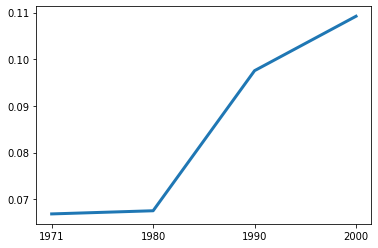

In [59]:
# Using line chart to compare beta1, the coefficient of variable of years of education of the head

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(coef_df['year'],coef_df['beta1'],linewidth = 3.0)


#### OLS Method

In [35]:
import statsmodels.api as sm

df_1971['const'] = 1

reg1 = sm.OLS(df_1971['lnw'], df_1971[['const','hyrsed','age','DhraceB','DhraceH','DhraceO']].astype(float),missing='drop')

results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           7.42e-82
Time:                        13:51:59   Log-Likelihood:                -728.06
No. Observations:                1380   AIC:                             1466.
Df Residuals:                    1375   BIC:                             1492.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5510      0.073     21.382      0.0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Findings

1. We can see the two scipy.optimize.minimize() methods return the same results of coefficients, verifying the reliability of the MLE method in solving coefficients of the econometric models.
2. The coefficient of the Hispanic dummy variable in the OLS method is different from that of the MLE method. I double-checked the data and found there is only one unique value in this column in every four data frames. Therefore OLS's result makes more sense. However, I didn't understand why MLE got 0.1 as the coefficient. 
3. Because beta1 is always positive, the education years of the heads are related to their wages. And the impact has become more significant over time. In 1971, one more year of education was associated with 7% of wage increases. However, in 2000, one more year of education was associated with 11% of wage increases. This was a significant trend.  